In [1]:
# ! pip install requests
# ! pip install bs4
# ! pip install wikipedia 

In [2]:
import os 
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import wikipedia   # this package is used to fetch text data from wikipedia
import requests   # connect between python and a webserver 
from bs4 import BeautifulSoup  # parsing data and fetching from website
pd.set_option("display.max_colwidth", 999)

## Reading data from csv or tsv file 

In [3]:
os.chdir(r"C:\Users\YAMIM\Desktop\Projects\NLP")

In [4]:
os.listdir()

['Data Fetch NLP different sources.ipynb',
 'imdb_top_250_movies.csv',
 'movie-train.tsv',
 'sms.csv',
 'Test (1).csv',
 'Train (1).csv']

In [5]:
sms=pd.read_csv("sms.csv")

In [6]:
sms.head()

,Unnamed: 0,label,message
0,0,ham,"Go until jurong point, crazy Available only in bugis n great world la e buffet Cine there got amore wat"
1,1,ham,Ok lar... Joking wif u oni...
2,2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,3,ham,U dun say so early hor... U c already then say...
4,4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [7]:
sms.shape

(5572, 3)

In [8]:
sms.dtypes

Unnamed: 0     int64
label         object
message       object
dtype: object

In [9]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5572 non-null   int64 
 1   label       5572 non-null   object
 2   message     5572 non-null   object
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


#### Read TSV file

In [10]:

movie=pd.read_csv("movie-train.tsv", sep="\t") #tsv - tab seperated value(tsv) '\t' 
movie

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


#### Reading wikipedia data 

In [11]:
wiki_obama=wikipedia.page("Indian Army").content
print(wiki_obama) 

The Indian Army is the land-based branch and the largest component of the Indian Armed Forces. The President of India is the Supreme Commander of the Indian Army, and its professional head is the Chief of Army Staff (COAS), who is a four-star general. Two officers have been conferred with the rank of field marshal, a five-star rank, which is a ceremonial position of great honour. The Indian Army was formed in 1895 alongside the long established presidency armies of the East India Company, which too were absorbed into it in 1903. The princely states had their own armies, which were merged into the national army after independence. The units and regiments of the Indian Army have diverse histories and have participated in several battles and campaigns around the world, earning many battle and theatre honours before and after Independence.The primary mission of the Indian Army is to ensure national security and national unity, to defend the nation from external aggression and internal thre

In [12]:
len(wiki_obama)

69892

In [13]:
from wordcloud import WordCloud

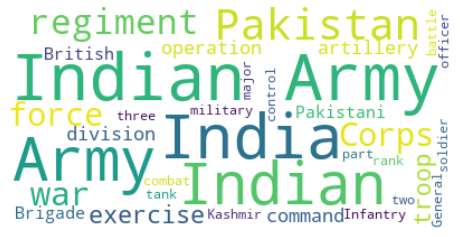

In [14]:
wordcloud = WordCloud(max_words=100,min_font_size=10,
                      background_color='white',
                      relative_scaling=0.5,
                      random_state=5).generate_from_text(wiki_obama)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Reading data from any website 

In [15]:
# This syntax is making connection with the given url
url="https://www.timesnownews.com/sports"
req=requests.get(url) 

In [16]:
req  # response [200] :request was successful / connection established 

<Response [200]>

In [17]:
# 100 : informational code indicates that the request is intiated by the browser in continues 
# 200 : successful connection
# 300 : Redirecting codes 
# 400 : Client error indicating that there was a problem with request
# 404 : not found : page is available or the server can not find the resources 
# etc...

In [18]:
# req.content

In [19]:
soup=BeautifulSoup(req.content, 'html.parser')

In [20]:
# soup

In [21]:
sports=[]
for i in soup.find_all("div", class_="undefined"):
        v=i.text
        sports.append(v)
sports  

["PBKS vs KKR Weather Report: Will Heavy Rain in Mohali Wash Out Punjab Kings' First Home Game in IPL 2023?",
 '3 Players Who Can Replace Kane Williamson In Gujarat Titans XI After Knee Injury Rules Him Out Of IPL 2023',
 "Kylian Mbappe To Real Madrid? PSG Star 'Informs' La Liga Club That He Wishes To Join Them In 2024 – Report",
 "Sam Curran, Sikandar Raza to replace Bairstow, Rabada: Punjab Kings' likely XI for IPL 2023 match against KKR",
 '3 Overseas Players To Start, All Indian Bowling Attack? Predicting Delhi Capitals’ XI for IPL 2023 Clash vs LSG',
 'WATCH: MS Dhoni In Pain After Getting Injured During CSK IPL 2023 Opener Against Gujarat Titans',
 "Arijit Singh Touches MS Dhoni's Feet During IPL 2023 Opening Ceremony In Ahmedabad, Pictures Go Viral",
 "Gujarat Titans Equal Rajasthan Royals' Record By Securing Win Over MS Dhoni's CSK In IPL 2023 Opener",
 "Munh Phodbe Ka? Bhojpuri Commentary Enthralls Fans in Ipl 2023, Commentators' Hilarious Remarks Go Viral - Watch",
 'WPL Hang

In [22]:
url1="https://www.timesnownews.com/viral"
req1=requests.get(url1)
soup1=BeautifulSoup(req1.content, 'html.parser')

In [23]:
viral=[]
for i in soup1.find_all("div", class_="undefined"):
    v=i.text
    viral.append(v)

In [24]:
viral

['Woman who Survived 14,000-Feet Fall After Parachute Failed To Open Says She Thought She Was In Heaven',
 'CatGPT AI Chatbot Has The Purrfect Answers To All Your Questions',
 'Man Fakes His Death To Live With Girlfriend Alleges Wife Who Prepared For His Last Rites',
 "Man Jailed For 'Emotionally Blackmailing' His Parents And Leaving Them  'Depressed'",
 "Teenager Gets 'Banned' For Complaining About 'Obese' Next Seat Passenger During 12-Hour Flight",
 'IPL 2023 opening ceremony: The Rashmika Mandanna performance that never happened',
 'This Mind-Bending Optical Illusion Will Leave You Questioning Reality',
 'Wordle 651 answer, hints and clues for Wordle today, 1 April 2023',
 "Mom Called 'Monster' For Putting Baby Through Laser Treatment Defends Herself",
 "14 April Fool's Day pranks that'll get a hysterical laugh",
 "Airline Passenger Shocked To Find One-Third Whiskey Missing From Luggage, People Say 'Thieves Have Good Taste'",
 'Australian startup makes mammoth meatball from long-ext

In [25]:
url_business="https://www.timesnownews.com/business-economy"
business_req=requests.get(url_business)
business_req

<Response [200]>

In [26]:
bus=BeautifulSoup(business_req.content, 'html.parser')
bus

<!DOCTYPE html>
<html class="no-js" lang="en"><head><meta charset="utf-8"/><meta content="ie=edge" http-equiv="x-ua-compatible"/><meta content="width=device-width, initial-scale=1, maximum-scale=5.0" name="viewport"/><meta content="en" http-equiv="content-language"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="true" name="HandheldFriendly"/><meta content="width" name="MobileOptimized"/><meta content="yes" name="mobile-web-app-capable"/><meta content="IE=edge" http-equiv="X-UA-Compatible"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="TimesNow" property="og:site_name"/><meta content="summary_large_image" name="twitter:card"/><meta content="TIMESNOW" name="twitter:site"/><meta content="@TIMESNOW" property="twitter:creator"/><meta content="1280" property="og:image:width"/><meta content="720" property="og:image:height"/><meta content="#ffffff" media="(prefers-color-scheme: light)" name="theme-color"/><meta content="

In [27]:
bus=BeautifulSoup(business_req.content, 'html.parser')
business_new = []
for k in bus.find_all('div', class_='undefined'):
    y = k.text
    business_new.append(y)
business_new

['Commercial LPG cylinder cheaper by Rs 91.50 in Delhi - Check city-wise rates of cooking gas',
 "Shrinking population! This Asian country to dole out cash subsidies to people to have babies - It's not China",
 'New Financial Year kicks in! From income tax to NPS withdrawal rules - 10 major changes in financial landscape from April 1',
 'US visas: Good news! Now people travelling on B1, B2 visas can apply for jobs in US',
 'Customers alert! Do you need to pay any charges on UPI transactions? Confusion cleared here!',
 'India Post Payments Bank launches WhatsApp Banking Services for customers; know features',
 'How small businesses can grow online without a webpage - EXPLAINED',
 'THIS Indian Railways multibagger stock under Rs 100 declares dividend - check record date',
 "India's forex reserves rise for second consecutive week, reach USD 578.778 billion",
 'OYO IPO around Diwali? What we know so far about its Draft Red Herring Prospectus status',
 'Last trading day of FY23: How indices

In [28]:
# business_new

In [29]:
bus1=pd.DataFrame(business_new, columns=["News"])

In [30]:
vir=pd.DataFrame(viral, columns=["News"])
sports=pd.DataFrame(sports, columns=["News"])

In [31]:
Final_news=pd.concat([bus1, vir])

In [32]:
Final_news

,News
0,Commercial LPG cylinder cheaper by Rs 91.50 in Delhi - Check city-wise rates of cooking gas
1,Shrinking population! This Asian country to dole out cash subsidies to people to have babies - It's not China
2,New Financial Year kicks in! From income tax to NPS withdrawal rules - 10 major changes in financial landscape from April 1
3,"US visas: Good news! Now people travelling on B1, B2 visas can apply for jobs in US"
4,Customers alert! Do you need to pay any charges on UPI transactions? Confusion cleared here!
...,...
16,Former Meta recruiter says she was paid Rs 1.5 crore 'to do nothing' amid Facebook layoffs
17,Wordle 650 Answer: Hints And Clues For Wordle Today (March 31)
18,"April Fool's Day 2023: Jokes To Share, Pranks Ideas To Try On Your Friends And Family"
19,Viral Video Appears To Show Internet Sensation Hasbulla Abusing A Cat; His Fans Are Outraged


### Reading from Amazon

In [33]:
# url="https://www.amazon.in/Redgear-Gaming-Semi-Honeycomb-Windows-Gamers/product-reviews/B08CHZ3ZQ7/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2"
# amazon=requests.get(url)
# amazon

In [34]:
# 503 : server is not ready to handle this request 

In [35]:
# for i in soup.find_all("span"):
#     print(i)

In [36]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
 
 
# Downloading imdb top 250 movie's data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")
movies = soup.select('td.titleColumn')
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value')
        for b in soup.select('td.posterColumn span[name=ir]')]

list = []

for index in range(0, len(movies)):
     
    # Separating movie into: 'place',
    # 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"place": place,
            "movie_title": movie_title,
            "rating": ratings[index],
            "year": year,
            "star_cast": crew[index],
            }
    list.append(data)
 
# printing movie details with its rating.
for movie in list:
    print(movie['place'], '-', movie['movie_title'], '('+movie['year'] +
        ') -', 'Starring:', movie['star_cast'], movie['rating'])
 
 
##.......##
df = pd.DataFrame(list)
df.to_csv('imdb_top_250_movies.csv',index=False)

1 - The Shawshank Redemption (1994) - Starring: Frank Darabont (dir.), Tim Robbins, Morgan Freeman 9.235787496765674
2 - The Godfather (1972) - Starring: Francis Ford Coppola (dir.), Marlon Brando, Al Pacino 9.155825362434731
3 - The Dark Knight (2008) - Starring: Christopher Nolan (dir.), Christian Bale, Heath Ledger 8.991849734975217
4 - The Godfather Part II (1974) - Starring: Francis Ford Coppola (dir.), Al Pacino, Robert De Niro 8.983851906148168
5 - 12 Angry Men (1957) - Starring: Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb 8.953298541669302
6 - Schindler's List (1993) - Starring: Steven Spielberg (dir.), Liam Neeson, Ralph Fiennes 8.94028048795786
7 - The Lord of the Rings: The Return of the King (2003) - Starring: Peter Jackson (dir.), Elijah Wood, Viggo Mortensen 8.932682412388544
8 - Pulp Fiction (1994) - Starring: Quentin Tarantino (dir.), John Travolta, Uma Thurman 8.846198548479247
9 - The Lord of the Rings: The Fellowship of the Ring (2001) - Starring: Peter Jackson (di

In [37]:
df

,place,movie_title,rating,year,star_cast
0,1,The Shawshank Redemption,9.235787496765674,1994,"Frank Darabont (dir.), Tim Robbins, Morgan Freeman"
1,2,The Godfather,9.155825362434731,1972,"Francis Ford Coppola (dir.), Marlon Brando, Al Pacino"
2,3,The Dark Knight,8.991849734975217,2008,"Christopher Nolan (dir.), Christian Bale, Heath Ledger"
3,4,The Godfather Part II,8.983851906148168,1974,"Francis Ford Coppola (dir.), Al Pacino, Robert De Niro"
4,5,12 Angry Men,8.953298541669302,1957,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb"
...,...,...,...,...,...
245,246,The Iron Giant,8.005883817205019,1999,"Brad Bird (dir.), Eli Marienthal, Harry Connick Jr."
246,247,The Help,8.005552906696371,2011,"Tate Taylor (dir.), Viola Davis, Emma Stone"
247,248,Dersu Uzala,8.00444442527179,1975,"Akira Kurosawa (dir.), Maksim Munzuk, Yuriy Solomin"
248,249,Aladdin,8.003831679994697,1992,"Ron Clements (dir.), Scott Weinger, Robin Williams"


In [38]:
url = "https://www.timesnownews.com/"
response = requests.get(url)
data = response.text
soup = BeautifulSoup(data,'html.parser')
tags = soup.find_all('a')
for tag in tags:
    print(tag.get('href'))


https://www.facebook.com/Timesnow
https://twitter.com/timesnow
https://www.instagram.com/timesnow
https://www.timesnownews.com
/
/latest-news
/education
/india
/business-economy
/entertainment-news
/web-stories
/viral
/sports/cricket/ipl
https://www.letstalkgrowth.co.in/?utm_source=timesnownews&utm_medium=homepagegroup
/videos
/topic/leaders-of-tomorrow
/live-tv
#
#
/sports/cricket/ata-ipl-2023-gt-vs-csk-live-score-gujarat-titans-vs-chennai-super-kings-cricket-match-online-today-narendra-modi-stadium-ahmedabad-liveblog-99144473
/education/bseb-10th-result-2023-live-bihar-board-matric-class-10-results-marksheet-online-liveblog-99128944
/education/bseb-10th-result-2023-live-update-bihar-board-10th-result-date-time-biharboardonline-bihar-gov-in-liveblog-99046789
/videos/viral-videos/viral-video-handheld-fireworks-gun-briefly-sets-brides-wedding-attire-on-fire-video-99142757
https://indiadigitalfest.in
https://www.timesnownews.com/special/indian-super-women
/short-videos/madhya-pradesh-mur

In [39]:
page=["latest-news","elections","india","business-economy","education"
,"entertainment-news","viral","sports","health","videos","cryptonow","live-tv"]

myurl=[]
ur="https://www.timesnownews.com"
for i in page:
    myurl.append(ur+"/"+str(i))

In [40]:
my_new=[]
for j in myurl:
    business_req=requests.get(url_business)
    bus=BeautifulSoup(business_req.content, 'html.parser')
    for k in bus.find_all("div", class_="undefined"):
        y=k.text
        my_new.append(y)
    

In [41]:
len(my_new)

504

In [42]:
from bs4 import BeautifulSoup
import requests 


url = "https://www.timesnownews.com/"


response = requests.get(url)


#print(response)


data = response.text


soup = BeautifulSoup(data,'html.parser')


jobs = soup.find_all('a',{'class':'href'})


for job in jobs:
    title = job.find('div',{'class':'undefined'}).text
    
    print('Job Title:', title, '\n---')


In [43]:
import requests
from bs4 import BeautifulSoup
from lxml import etree as et
import time
import random
import json
from unidecode import unidecode
start_url = "https://www.imdb.com/chart/top" #request
header = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.138 Safari/537.36"}
movie_urls = []

In [44]:
response = requests.get(start_url, headers=header) #explain beautfiful soup and etree
soup = BeautifulSoup(response.content, 'html.parser')
dom = et.HTML(str(soup))
movie_urls_list = dom.xpath('//td[@class="titleColumn"]/a/@href')

In [45]:
for i in movie_urls_list:
    long_url = "https://www.imdb.com" + i
    short_url = long_url.split("?")[0]
    movie_urls.append(short_url)

In [46]:
def time_delay():
    time.sleep(random.randint(2, 5))

In [47]:
with open("data_v1.json", "w") as f:
    json.dump([], f)

def write_to_json(new_data, filename='data_v1.json'):
    with open(filename, 'r+') as file:
        file_data = json.load(file)
        file_data.append(new_data)
        file.seek(0)
        json.dump(file_data, file, indent=4)

In [ ]:
for movie_url in movie_urls:
    response = requests.get(movie_url, headers=header)
    soup = BeautifulSoup(response.content, 'html.parser')
    dom = et.HTML(str(soup))

    rank = movie_urls.index(movie_url) + 1
    movie_name = dom.xpath('//h1[@data-testid="hero-title-block__title"]/text()')[0]
    movie_year = dom.xpath('//a[@class="ipc-link ipc-link--baseAlt ipc-link--inherit-color sc-8c396aa2-1 WIUyh"]/text()')[0]
    genre = dom.xpath('//span[@class="ipc-chip__text"]/text()')
    director_name = dom.xpath('//a[@class="ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link"]/text()')[0]
    rating = dom.xpath('//span[@class="sc-7ab21ed2-1 jGRxWM"]/text()')[0]
    actors_list = dom.xpath('//a[@data-testid="title-cast-item__actor"]/text()')
    actors_list = [unidecode(i) for i in actors_list]

    write_to_json({'rank': rank,
                   'movie_name': movie_name,
                   'movie_url': movie_url,
                   'movie_year': movie_year,
                   'genre': genre,
                   'director_name': unidecode(director_name),
                   'rating': rating,
                   'actors': actors_list})

    time_delay()
    print("{}% data is written to json file".format(round((rank * 100) / len(movie_urls))),2)